### CARGAR LA RESNET 50 Y GENERAR PREDICCIONES 
Estoy usando rezise asi bien cabeza acordarse de que lo puedo adaptar para que sea una VCNN (tengo q reentrenar?)

Imagen: 23656401178.jpg - Predicción: Welsh_springer_spaniel
Imagen: 49107942801.jpg - Predicción: trolleybus
Imagen: 37247857500.jpg - Predicción: valley
Imagen: 49107172616.jpg - Predicción: tile_roof
Imagen: 49108331112.jpg - Predicción: tiger_cat
Imagen: 37285112550.jpg - Predicción: ping-pong_ball
Imagen: 49105984193.jpg - Predicción: passenger_car
Imagen: 37510048192.jpg - Predicción: window_shade
Imagen: 37471754862.jpg - Predicción: groom


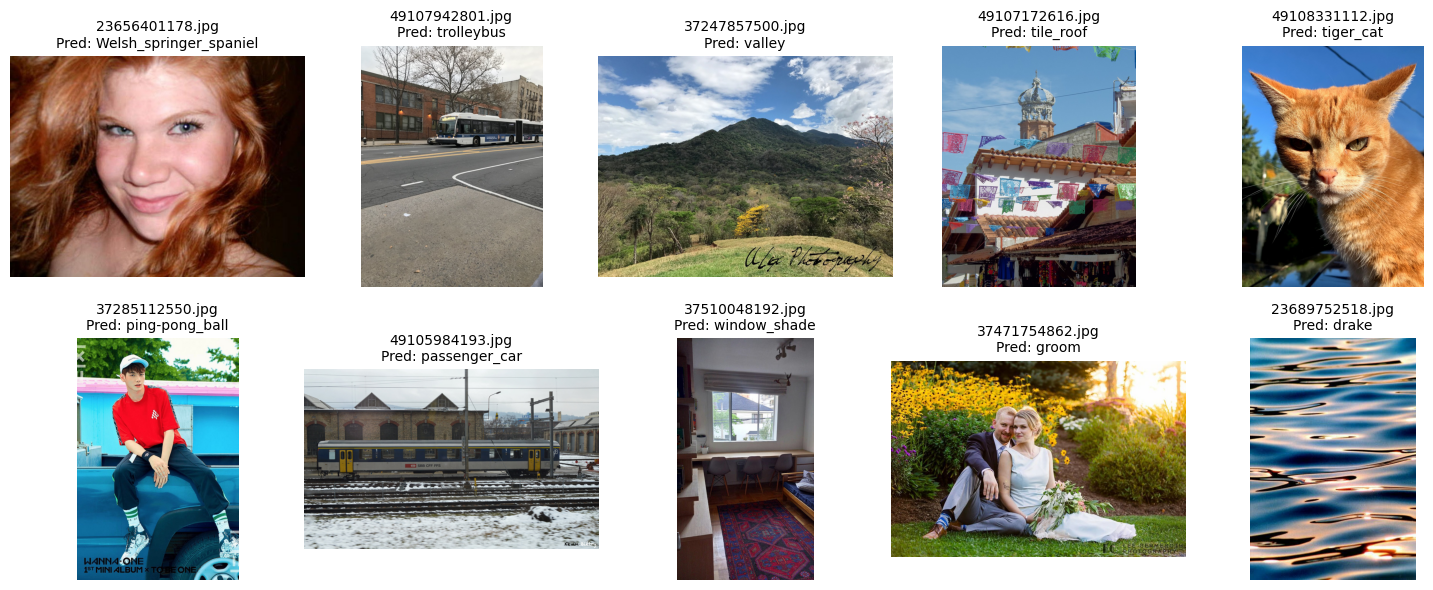

In [ ]:
import os
import torch
from torchvision import models, transforms
from PIL import Image
import json
import matplotlib.pyplot as plt

model = models.resnet50(pretrained=True)
model.eval() 

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

with open('./labels/imagenet_class_index.json') as f:
    class_idx = json.load(f)

img_folder = "./data/raw/imgs"

def predict(image_path):
    img = Image.open(image_path)
    img = transform(img).unsqueeze(0)  # Aplicar las transformaciones
    with torch.no_grad():
        output = model(img)
    _, predicted_idx = torch.max(output, 1)
    predicted_class = class_idx[str(predicted_idx.item())][1]
    return predicted_class

preds = []

fig, axes = plt.subplots(2, 5, figsize=(15, 6)) 
img_files = [f for f in os.listdir("./data/raw/imgs") if os.path.isfile(os.path.join("./data/raw/imgs", f)) and f.endswith('.jpg')]
for i, img_name in enumerate(img_files):
    img_path = os.path.join("./data/raw/imgs", img_name)
    pred_class = predict(img_path)
    preds.append((img_name, pred_class))
    img = Image.open(img_path)    
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')  
    ax.set_title(f"{img_name}\nPred: {pred_class}", fontsize=10)
    if i > 8: break

    print(f"Imagen: {img_name} - Predicción: {pred_class}")

plt.tight_layout()
plt.show()


## TRATAR DE GENERAR VECTOR EMBEDDINGS DE LAS IMAGENES USANDO CLIP

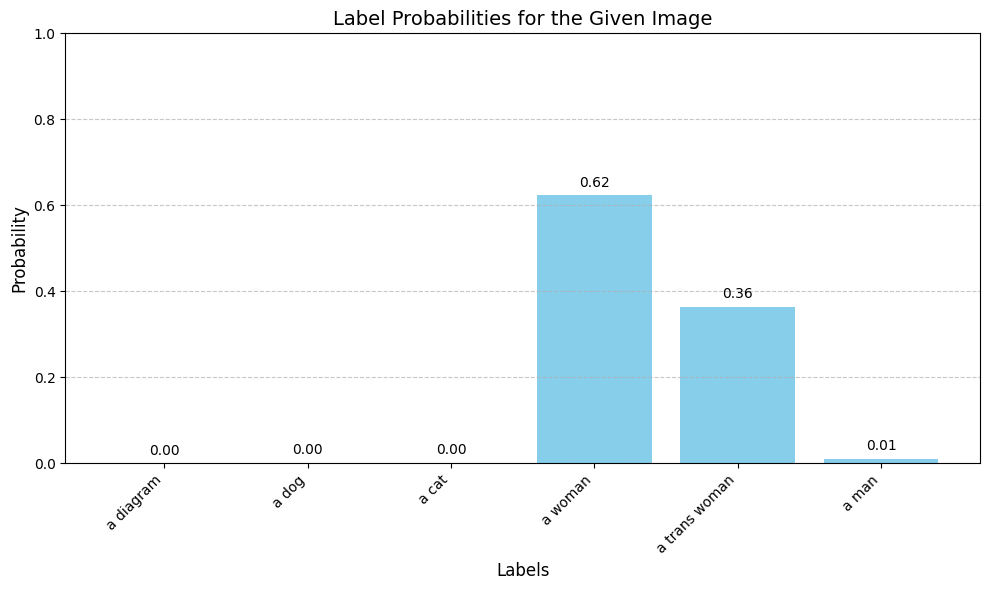

In [20]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

# Set up device and load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Prepare image and text inputs
image = preprocess(Image.open("./data/ladedan.webp")).unsqueeze(0).to(device)
labels = ["a diagram", "a dog", "a cat", "a woman", "a trans woman", "a man"]
text = clip.tokenize(labels).to(device)

# Perform inference
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy().flatten()  # Ensure 1D array

# Plot the probabilities
plt.figure(figsize=(10, 6))
plt.bar(labels, probs, color='skyblue')
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Label Probabilities for the Given Image', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 1)  # Ensure y-axis is within probability range
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with probabilities
for i, p in enumerate(probs):
    plt.text(i, p + 0.02, f"{p:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [6]:
image_features.shape


torch.Size([1, 512])

In [4]:
text_features.shape

torch.Size([3, 512])